### Carregando os pacotes necessários

In [1]:
from random import random
import pandas as pd
import numpy as np
#import geopandas as gpd
import folium
import pygal
import sklearn
from sklearn.preprocessing import StandardScaler
import os

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import random

### Carregando os arquivos 

In [3]:
path = os.path.abspath(os.path.join('..', 'input'))
path_data_winners = os.path.join(path, 'ano_vencedor_copa.csv')
path_data_matches = os.path.join(path, 'matches.csv')
path_data_shp = os.path.join(path, 'UIA_Latitude_Longitude_Graticules_and_World_Countries_Boundaries.shp')

In [4]:
matches = pd.read_csv(path_data_matches)
winners = pd.read_csv(path_data_winners)

In [5]:
matches

,year,match_number,team_a,goals_team_a,goals_team_b,team_b,score_diff,winner,matches_played_a,matches_won_a,...,podium_score_cum_a,matches_won_cum_percent_a,matches_played_b,matches_won_b,podium_score_b,cups_won_b,matches_played_cum_b,matches_won_cum_b,podium_score_cum_b,matches_won_cum_percent_b
0,1991,1,China PR,4,0,Norway,4,a,3,2,...,0,66.666667,6,4,8,0,6,4,8,66.666667
1,1991,23,Sweden,1,4,Norway,-3,b,6,4,...,4,66.666667,6,4,8,0,6,4,8,66.666667
2,1991,13,China PR,4,1,New Zealand,3,a,3,2,...,0,66.666667,3,0,0,0,3,0,0,0.000000
3,1991,2,Denmark,3,0,New Zealand,3,a,3,1,...,0,33.333333,3,0,0,0,3,0,0,0.000000
4,1991,8,Norway,4,0,New Zealand,4,a,6,4,...,8,66.666667,3,0,0,0,3,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2019,27,South Africa,0,4,Germany,-4,b,3,0,...,0,0.000000,5,4,0,2,39,30,44,76.923077
241,2019,29,Jamaica,1,4,Australia,-3,b,3,0,...,0,0.000000,3,2,0,0,20,7,0,35.000000
242,2019,33,Netherlands,2,1,Canada,1,a,7,6,...,8,70.000000,4,2,0,0,22,8,2,36.363636
243,2019,42,Sweden,1,0,Canada,1,a,7,5,...,20,65.714286,4,2,0,0,22,8,2,36.363636


In [6]:
winners.rename (columns = {'Ano': 'year', 'Num': 'position', 'TimeA': 'team'}, inplace=True)
winners

,year,position,team
0,1991,1,USA
1,1991,2,Norway
2,1991,3,Sweden
3,1991,4,Germany
4,1995,1,Norway
5,1995,2,Germany
6,1995,3,USA
7,1995,4,China PR
8,1999,1,USA
9,1999,2,China PR


### Pegando o ano mais recente (2019) - Percentual de vitórias;

In [7]:
matches2019 = pd.DataFrame(matches.loc[matches['year'] == 2019,:].sort_values(by = 'cups_won_a', ascending = False)).reset_index()

Text(0.5, 0, 'Time (a)')

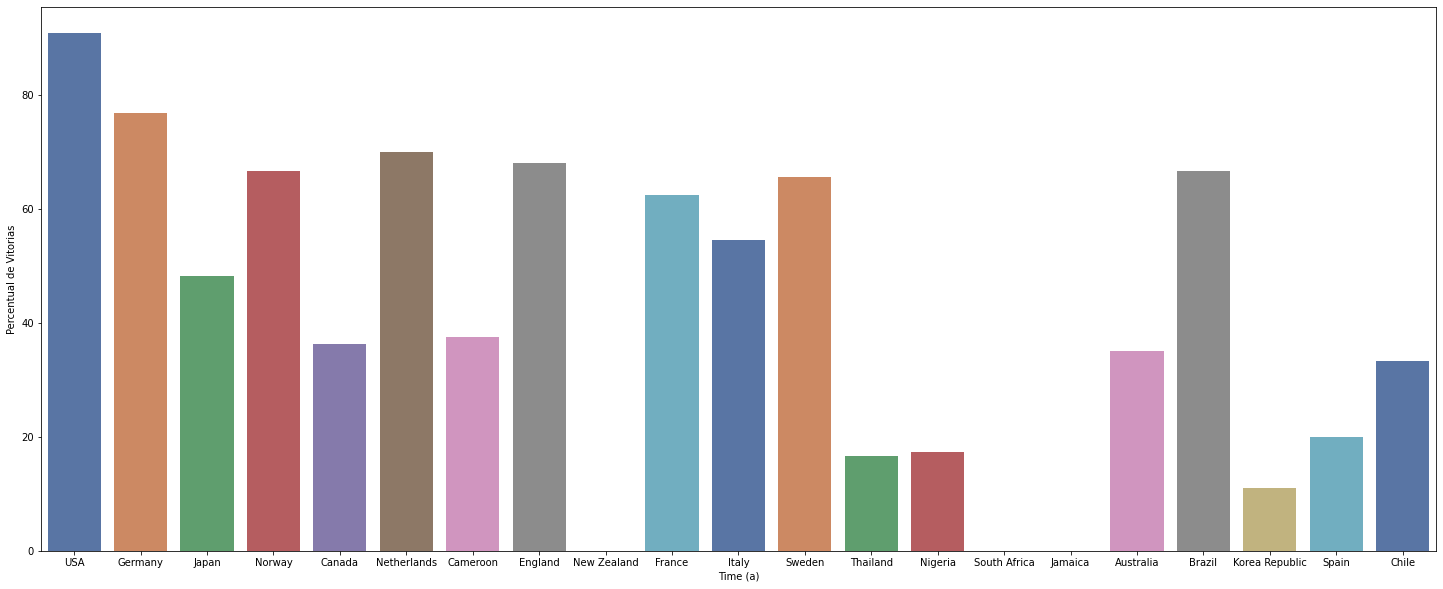

In [8]:
f, (ax1) = plt.subplots(1, 1, figsize=(25, 10), sharex=True)
sns.set_color_codes("deep")
sns.barplot(x='team_a', y='matches_won_cum_percent_a', data = matches2019.drop_duplicates(), palette = 'deep', ax=ax1)
ax1.set_ylabel("Percentual de Vitorias")
ax1.set_xlabel("Time (a)")

### Partidas jogadas e partidas ganhas;

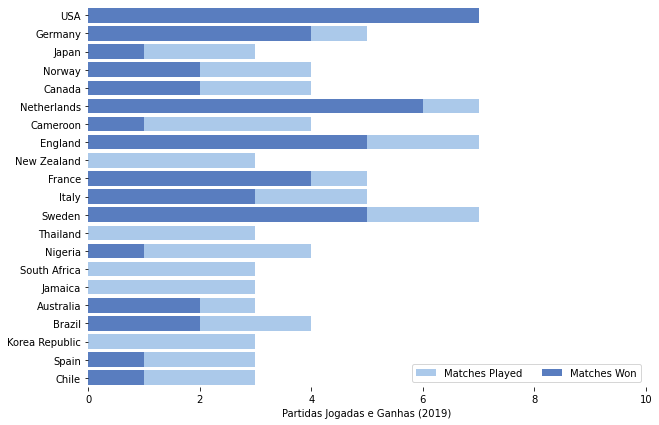

In [9]:
f, ax = plt.subplots(figsize=(10, 7))
sns.set_color_codes("pastel")
sns.barplot(x="matches_played_a", y="team_a", data=matches2019.drop_duplicates(),
            label="Matches Played", color="b")

sns.set_color_codes("muted")
sns.barplot(x="matches_won_a", y="team_a", data=matches2019.drop_duplicates(),
            label="Matches Won", color="b")


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 10), ylabel="",
       xlabel="Partidas Jogadas e Ganhas (2019)")
sns.despine(left=True, bottom=True)

### Percentual de partidas ganhas e de pódio;

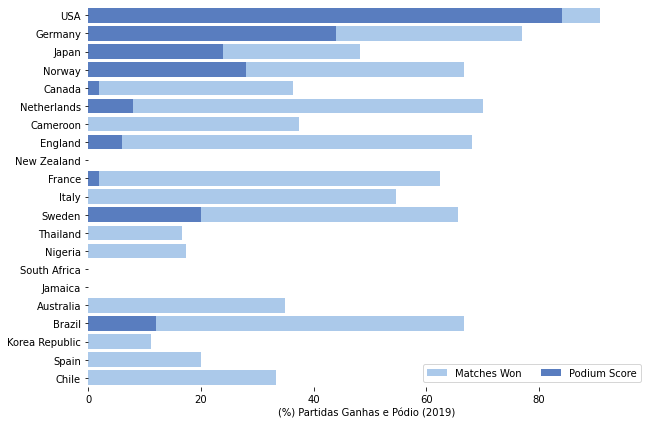

In [10]:
f, ax = plt.subplots(figsize=(10, 7))

sns.set_color_codes("pastel")
sns.barplot(x="matches_won_cum_percent_a", y="team_a", data=matches2019.drop_duplicates(),
            label="Matches Won", color="b")

sns.set_color_codes("muted")
sns.barplot(x="podium_score_cum_a", y="team_a", data=matches2019.drop_duplicates(),
            label="Podium Score", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 99), ylabel="",
       xlabel="(%) Partidas Ganhas e Pódio (2019)")
sns.despine(left=True, bottom=True)

### Para os 5 últimos anos e para os 4 principais times;

In [11]:
years = [2003,2007,2011,2015,2019]
matches2 = pd.DataFrame(matches.loc[matches['year'].isin(years),:].sort_values(by = 'cups_won_a', ascending = False).reset_index())
teams = matches2['team_a'].drop_duplicates()[:4].to_list()
matches2 = matches2.loc[matches2['team_a'].isin(teams),:]

### Percentual de partidas ganhas

Text(0.5, 0, 'Ano')

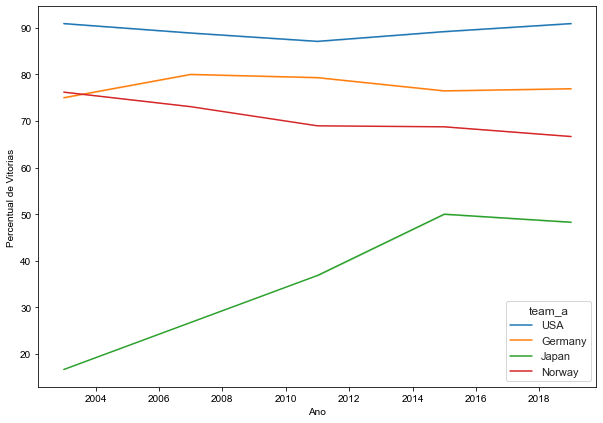

In [12]:
f, (ax1) = plt.subplots(1, 1, figsize=(10, 7), sharex=True)
sns.set_theme(style="whitegrid")
sns.lineplot(x = 'year', y='matches_won_cum_percent_a', hue = 'team_a', data = matches2.drop_duplicates(), palette = 'tab10', ax=ax1)
ax1.set_ylabel("Percentual de Vitorias")
ax1.set_xlabel("Ano")


### Partidas jogadas e partidas ganhas

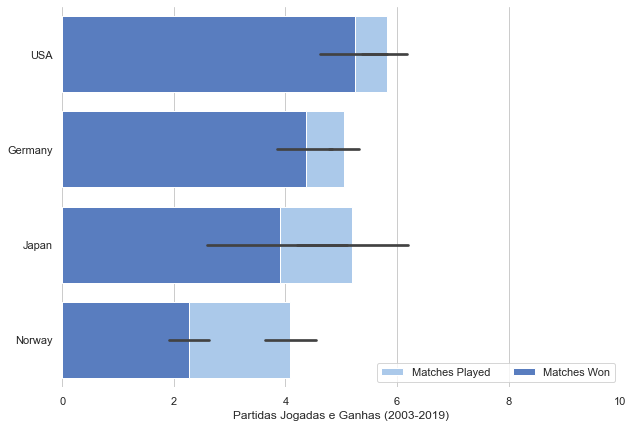

In [13]:
f, ax = plt.subplots(figsize=(10, 7))
sns.set_color_codes("pastel")
sns.barplot(x="matches_played_a", y="team_a", data=matches2,
            label="Matches Played", color="b")

sns.set_color_codes("muted")
sns.barplot(x="matches_won_a", y="team_a", data=matches2,
            label="Matches Won", color="b")


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 10), ylabel="",
       xlabel="Partidas Jogadas e Ganhas (2003-2019)")
sns.despine(left=True, bottom=True)

## Número de pódios para os países;

In [14]:
win = winners.groupby(by = ['team']).agg({'team': 'count'})
shp = gpd.read_file(path_data_shp).replace(['China', 'United Kingdom', 'United States'], ['China PR', 'England','USA'])
shp.head()

NameError: name 'gpd' is not defined

In [ ]:
for _ in shp.index:
    country = shp.loc[_]['CNTRY_NAME']
    if country in win.index:
        shp.at[_, 'N_podios'] = win.loc[country]['team']
    else:
        shp.at[_, 'N_podios'] = 0
        
shp.head()

In [ ]:
win

In [ ]:
shp.explore('N_podios')

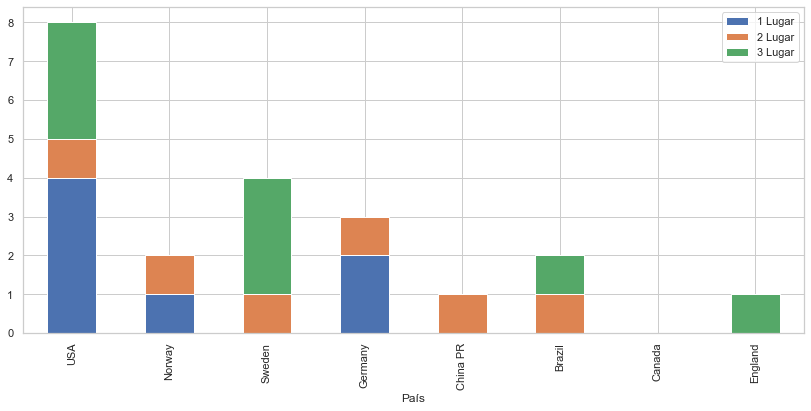

In [15]:
podium = pd.DataFrame({'1 Lugar': winners.loc[winners['position'] == 1, 'team'].value_counts(), 
                       '2 Lugar': winners.loc[winners['position'] == 2, 'team'].value_counts(), 
                       '3 Lugar': winners.loc[winners['position'] == 3, 'team'].value_counts()}, 
                       index = winners['team'])
ax = podium.drop_duplicates().plot.bar(stacked = True, figsize = (14,6), xlabel = 'País')

### Selecionando os 4 principais países;

In [16]:
top4 = podium.sort_values(by = '1 Lugar', ascending = False).drop_duplicates()[:4].index.to_list()

#### Evolução do número de pódios no acumulado 1991-2019

<AxesSubplot:>

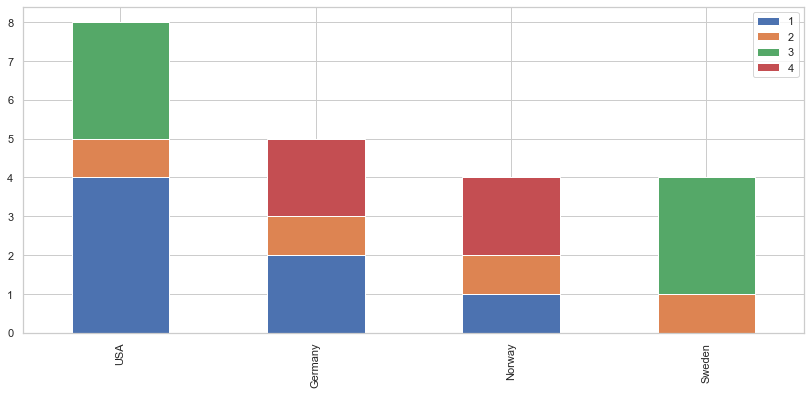

In [17]:
pd.DataFrame([winners.loc[winners['team'] == 'USA', 'position'].value_counts(),
              winners.loc[winners['team'] == 'Germany', 'position'].value_counts(),
              winners.loc[winners['team'] == 'Norway', 'position'].value_counts(), 
              winners.loc[winners['team'] == 'Sweden', 'position'].value_counts()], index = top4).plot.bar(stacked = True, figsize = (14,6))




### Anos em que ocuparam o pódio;

<AxesSubplot:>

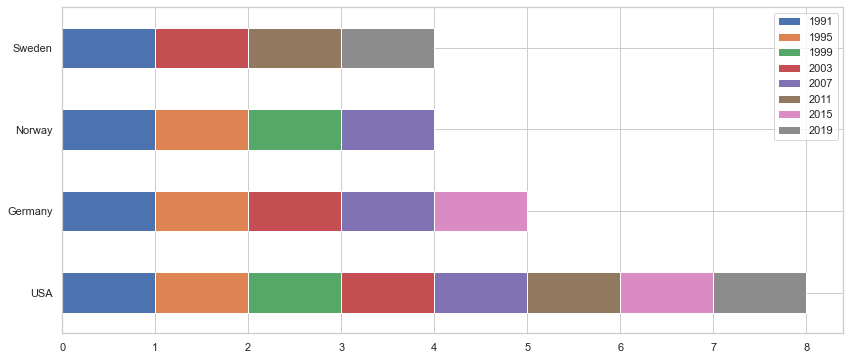

In [18]:
pd.DataFrame([winners.loc[winners['team'] == 'USA', 'year'].value_counts(),
              winners.loc[winners['team'] == 'Germany', 'year'].value_counts(),
              winners.loc[winners['team'] == 'Norway', 'year'].value_counts(), 
              winners.loc[winners['team'] == 'Sweden', 'year'].value_counts()], index = top4).plot.barh(stacked = True, figsize = (14,6))